In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from process_spectra import funcs
import process_spectra.funcs as funcs

In [29]:
def get_file_creation_time(file_path):
    nome_arquivo = os.path.splitext(os.path.basename(file_path))[0]
    _, hora_str, minuto_str, segundo_str, milissegundo_str = nome_arquivo.split('_')
    hora_str = f"{hora_str}:{minuto_str}:{segundo_str}.{milissegundo_str}"
    hora_str = datetime.strptime(hora_str, "%H:%M:%S.%f")
    hora=hora_str.time()
    total_segundos = hora.hour * 3600 + hora.minute * 60 + hora.second + hora.microsecond / 1_000_000
    return total_segundos

In [35]:
path="E:\\Analise_joao\\data\\"
folder="06_05_25"

In [36]:
for pastas in os.listdir(os.path.join(path,folder)):
    new_path = os.path.join(path,folder,pastas)
    
    if os.path.isdir(new_path):
        file = os.listdir(new_path)
        file = [os.path.join(new_path, x) for x in file]

        i=0
        rp = 3
        dwl = 2
        spec=[]
        filtrado=[]
        wavelengths = []
        timestamps = []

        for files in file:
            data = np.loadtxt(files, delimiter=';')
            mask = (data[:, 0] > 1500) & (data[:, 0] < 1600)
            if np.any(mask):  
                filtered_data = data[mask]
                spec.append(filtered_data) 
            filtrado.append(funcs.filter_spectrum(spec[i], None, 25, 2, quiet=True))
            spec[i]=filtrado[i][0]
            creation_time = get_file_creation_time(files)
            timestamps.append(creation_time)
            i+=1
        timestamps = np.array(timestamps)
        timestamps = timestamps - timestamps[0]
        novo_tempo=[]

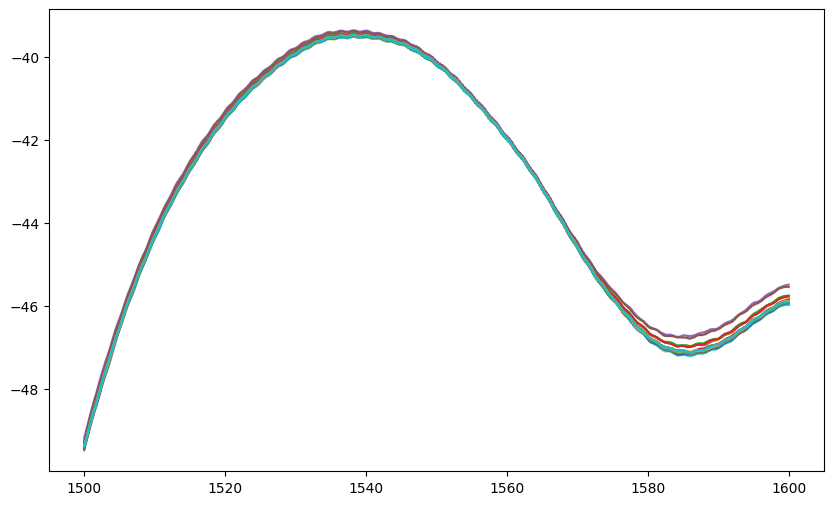

In [37]:
plt.figure(figsize=(10, 6))
for i in range(len(spec)):
    plt.plot(spec[i][:, 0], spec[i][:, 1], label='Original Spectrum')

In [38]:
spec

[array([[1500.05835   ,  -49.33953127],
        [1500.168579  ,  -49.27474142],
        [1500.278809  ,  -49.20975939],
        ...,
        [1599.748779  ,  -45.76526512],
        [1599.874146  ,  -45.76212478],
        [1599.999512  ,  -45.75980257]]),
 array([[1500.058228  ,  -49.40718284],
        [1500.168579  ,  -49.32351885],
        [1500.278809  ,  -49.24113652],
        ...,
        [1599.748779  ,  -45.78512377],
        [1599.874146  ,  -45.78294163],
        [1599.999512  ,  -45.78154278]]),
 array([[1500.058228  ,  -49.2630643 ],
        [1500.168457  ,  -49.19295841],
        [1500.278809  ,  -49.12310753],
        ...,
        [1599.748779  ,  -45.76158164],
        [1599.874146  ,  -45.76095424],
        [1599.999512  ,  -45.76128579]]),
 array([[1500.05835   ,  -49.34021419],
        [1500.168579  ,  -49.26541247],
        [1500.278809  ,  -49.19125376],
        ...,
        [1599.748779  ,  -45.7797198 ],
        [1599.874146  ,  -45.77561054],
        [1599.999512  